In [38]:
import csv
f = open('temp_ice.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
temp = []
ice = []

for row in data:
    temp.append(float(row[1]))
    ice.append(int(row[4]))

print(temp)
print(ice)

[22.1, 21.5, 24.5, 25.6, 22.7, 19.7, 20.6, 21.2, 20.9, 20.9, 24.6, 24.6, 23.6, 21.5, 17.5, 20.3, 22.5, 23.3, 23.4, 25.2, 26.5, 25.9, 24.3, 22.6, 26.0, 26.5, 26.8, 26.9, 25.1, 22.3, 26.6, 28.8, 29.3, 29.3, 29.2, 29.5, 28.2, 25.8, 26.9, 29.2, 27.0, 26.8, 25.0, 25.7, 26.0, 24.8, 25.5, 26.8, 27.4, 27.1, 23.2, 25.1, 24.8, 25.0, 27.5, 28.9, 29.3, 29.7, 30.7, 30.9, 27.2, 28.6, 26.8, 27.1, 28.9, 29.4, 28.7, 28.9, 26.8, 25.1, 24.7, 25.0, 27.0, 25.8, 27.6, 28.1, 26.7, 26.0, 25.6, 26.0, 28.2, 28.1, 26.8, 25.4, 24.8, 22.2, 23.8, 21.5, 22.6, 21.0, 19.1, 21.7, 24.0, 24.7, 24.2, 22.3, 19.2, 21.0, 22.8, 23.2, 24.3, 23.6, 23.3, 23.8, 24.3, 24.6, 25.2, 25.7, 25.6, 27.1, 24.6, 19.9, 19.4, 19.8, 17.5, 18.5, 19.6, 20.0, 20.9, 20.4, 20.4, 20.7, 20.9, 19.4, 21.4, 17.9, 16.6, 15.8, 14.3, 15.8, 13.1, 9.9, 11.1, 13.5, 16.3, 17.1, 18.2, 16.9, 11.2, 9.4, 10.5, 12.9, 14.0, 15.1, 14.0, 10.6, 11.3, 12.9, 13.2, 13.6, 14.8, 14.9, 14.9, 13.1, 11.1, 9.3, 4.9, 6.5, 9.6, 11.4, 12.9, 11.4, 13.5, 15.6, 16.3, 10.3, 9.7, 8.1,

In [39]:
print(min(temp), max(temp))

-14.7 30.9


In [40]:
# 평균 기온 값을 기준으로 도수분포 구간 설정하기
import numpy as np # numpy 불러오기

bins = np.arange(min(temp), max(temp), 8)
print(bins)

[-14.7  -6.7   1.3   9.3  17.3  25.3]


In [51]:
bins = np.arange(min(temp), max(temp)+8, 8)
print(bins)

[-14.7  -6.7   1.3   9.3  17.3  25.3  33.3]


In [52]:
hist, bins = np.histogram(temp, bins) # 히스토그램 값 계산하기
print(hist)
print(bins)

[ 10  46  61  90 104  55]
[-14.7  -6.7   1.3   9.3  17.3  25.3  33.3]


In [59]:
# 평균 기온 값을 기준으로 아이스크림 쇼핑 클릭량을 구분하여 저장하기
ice_buy = np.zeros(6)  # 아이스크림 쇼핑 클릭량의 합을 저장할 배열 생성하기

for i in range(0, len(temp)):
    if bins[0] <= temp[i] and temp[i] < bins[1]:  # 첫 번째 계급에 해당한다면
        ice_buy[0] += ice[i]
    elif bins[1] <= temp[i] and temp[i] < bins[2]:  # 두 번째 계급에 해당한다면
        ice_buy[1] += ice[i]
    elif bins[2] <= temp[i] and temp[i] < bins[3]:  # 세 번째 계급에 해당한다면
        ice_buy[2] += ice[i]
    elif bins[3] <= temp[i] and temp[i] < bins[4]:  # 네 번째 계급에 해당한다면
        ice_buy[3] += ice[i]
    elif bins[4] <= temp[i] and temp[i] < bins[5]:  # 다섯 번째 계급에 해당한다면
        ice_buy[4] += ice[i]
    else:  # 여섯 번째 계급에 해당한다면
        ice_buy[5] += ice[i]

print(ice_buy)

[ 383. 1859. 2987. 4253. 6320. 4062.]


In [70]:
# 평균 기온 값 계급별 아이스크림 쇼핑 클릭량의 평균 구하기
ice_buy_a = np.zeros(6) # 아이스크림 쇼핑 클릭량의 평균을 저장할 배열 생성

for i in range(0, len(ice_buy)):
	ice_buy_a[i] = ice_buy[i] / hist[i] # 계급별 아이스크림 쇼핑 클릭량 평균 구하기

for i in range(0, len(ice_buy)):
	print('%d %0.2f' % (ice_buy[i], ice_buy_a[i])) # 아이스크림 쇼핑 클릭량의 평균을 소수점 둘째 자리까지 출력

383 38.30
1859 40.41
2987 48.97
4253 47.26
6320 60.77
4062 73.85


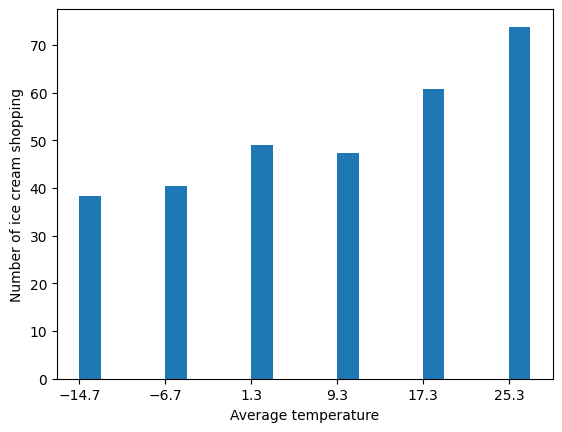

In [72]:
import matplotlib.pyplot as plt
plt.xlabel('Average temperature') # x축 제목 이름 정하기
plt.ylabel('Number of ice cream shopping') # y축 제목 이름 정하기
plt.bar(bins[0:6], ice_buy_a, width=2, align='edge') # 막대그래프 그리기
plt.xticks(bins[0:6]) # x축 눈금 이름 설정하기
plt.show()

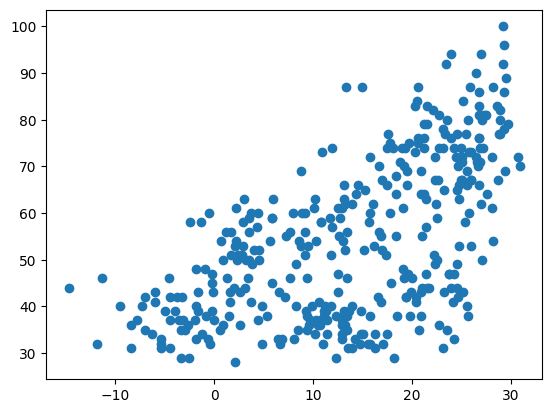

In [73]:
plt.scatter(temp, ice)
plt.show()

In [76]:
# 데이터 준비하기
import pandas as pd
df = pd.read_csv('temp_ice.csv', encoding='utf-8')
print(df.head(5))

           날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)  아이스크림/빙수
0  2022-06-01     22.1     16.2     28.6        82
1  2022-06-02     21.5     17.1     26.9        83
2  2022-06-03     24.5     18.7     32.6        72
3  2022-06-04     25.6     20.3     29.7        69
4  2022-06-05     22.7     20.2     27.0        67


In [77]:
# 데이터를 입력 변수와 출력 변수로 나누기
import numpy as np
data = np.array(df)
X = data[:, 1] # 평균 기온 열의 데이터를 출력 변수로 지정하기
Y = data[:, -1] # 아이스크림 쇼핑 클릭량 열의 데이터를 출력 변수로 지정하기

In [84]:
# 입력 변수와 출력 변수 각각의 평균(mean) 구하기
mean_x = np.mean(X)
mean_y = np.mean(Y)

# X 변수의 개수 구하기
n = len(X)

# 최소제곱법을 이용하여 beta0과 beta1 구하기
temp1 = 0
temp2 = 0

for i in range(n):
	temp1 += (X[i] - mean_x) * (Y[i] - mean_y)
	temp2 += (X[i] - mean_x) ** 2

beta1 = temp1 / temp2
beta0 = mean_y - (beta1 * mean_x)

# 계산 결과 출력하기
print('기울기(beta1): {0}, 절편(beta0): {1}'.format(beta1, beta0))

기울기(beta1): 0.9588673116198909, 절편(beta0): 41.06286193411985


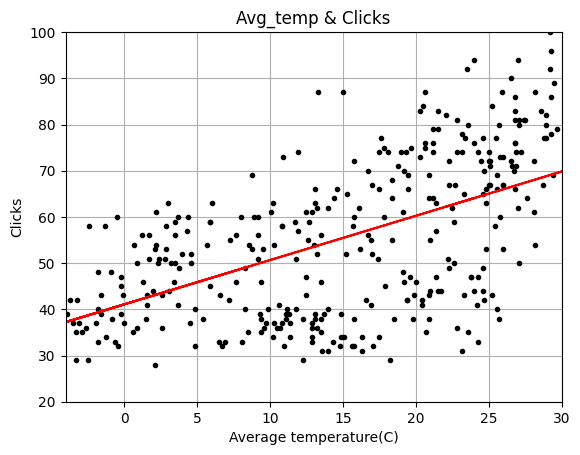

In [85]:
# 학습 결과 시각화하기
import matplotlib.pyplot as plt
Y_pred = beta0 + beta1 * X

plt.title('Avg_temp & Clicks')
plt.xlabel('Average temperature(C)')
plt.ylabel('Clicks')
plt.plot(X, Y, 'k.')
plt.plot(X, Y_pred, color='red')
plt.axis([-4, 30, 20, 100])
plt.grid()
plt.show()

In [88]:
# 평가하기
def RMSE(beta0, beta1, x, y):
	RMSE = np.sqrt(((y - (beta0 + beta1 * x)) ** 2).mean())
	return RMSE

results = RMSE(beta0, beta1, X, Y)
print('손실값 결과는? {0}'.format(results))

손실값 결과는? 13.482086896629518


In [92]:
def Regression(beta0, beta1, X):
	y_pred = beta0 + beta1 * X
	return y_pred

my_temp = float(input('안녕하세요. 오늘의 평균 기온을 입력해 주세요.:'))
predicted_value = Regression(beta0, beta1, my_temp)
print('아이스크림 쇼핑 클릭량은 100점을 기준으로 {0} 만큼 예상됩니다.'.format(predicted_value))

아이스크림 쇼핑 클릭량은 100점을 기준으로 65.03454472461712 만큼 예상됩니다.
